In [57]:
import pandas as pd
import seaborn as sns

In [58]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [59]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:ylabel='Survived'>

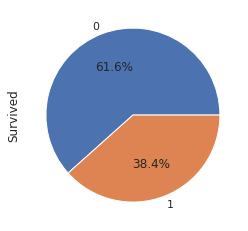

In [61]:
df_train['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [62]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 2 variables intéressantes : `Age et Sex`

<AxesSubplot:ylabel='Age'>

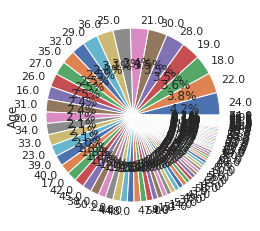

In [63]:
df_train['Age'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:ylabel='Sex'>

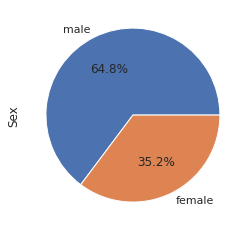

In [64]:
df_train['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:>

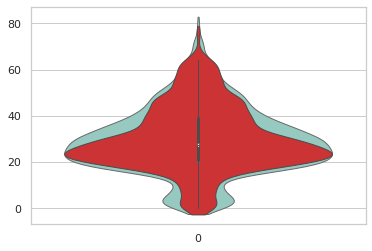

In [65]:
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

sns.violinplot(data=df_train['Age'], palette='Set3', bw=.2, cut=1, linewidth=1)
sns.violinplot(data=df_test['Age'], palette='Set1', bw=.2, cut=1, linewidth=1)

# Début du Data Cleaning

In [66]:
columns_iteration1 = ['Age', 'Sex']

In [67]:
for column in columns_iteration1:
    print(column + " " + str(df_train[column].isna().sum()))

Age 177
Sex 0


In [68]:
for column in columns_iteration1:
    print(column + " " + str(df_test[column].isna().sum()))

Age 86
Sex 0


In [69]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median') #most_frequent
imp.fit(df_train['Age'].values.reshape(-1,1))

SimpleImputer(strategy='median')

In [70]:
age_imp_train = imp.transform(df_train['Age'].values.reshape(-1,1))
type(age_imp_train)

numpy.ndarray

In [71]:
#change shape for pandas
df_train['Age'] = age_imp_train[0:,0]

# Convertion colonne `Sex`

In [72]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
df_train[columns_iteration1]

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,28.0,female
889,26.0,male


In [74]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_train['Sex'].values.reshape(-1,1))
sex_enc_train = enc.transform(df_train['Sex'].values.reshape(-1,1)).toarray()

sex_enc_train.shape

(891, 2)

In [75]:
# convertion du tableau en dataframe pour faciliter le renommage
df_train_sex = pd.DataFrame(sex_enc_train)
# renommage
df_train_sex.columns = ['is_female', 'is_male']

In [76]:
# ajout des colonnes créées dans df_train
df_train['is_female'] = df_train_sex['is_female']
df_train['is_male'] = df_train_sex['is_male']

In [77]:
# on veut travailler mtn avec is_female et is_male
columns_iteration1 = ['Age', 'is_female', 'is_male']

# extrait des labels
y = df_train['Survived']

df_train = df_train[columns_iteration1]

In [78]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(df_train, y)

KNeighborsClassifier()

In [53]:
df_train

,Age,is_female,is_male
0,22.0,0.0,1.0
1,38.0,1.0,0.0
2,26.0,1.0,0.0
3,35.0,1.0,0.0
4,35.0,0.0,1.0
...,...,...,...
886,27.0,0.0,1.0
887,19.0,1.0,0.0
888,28.0,1.0,0.0
889,26.0,0.0,1.0


# Phase de prédiction

Nettoyage de `df_test`

In [80]:
# simple imputer
age_imp_test = imp.transform(df_test['Age'].values.reshape(-1,1))
# change shape pour pandas
df_test['Age'] = age_imp_test[0:,0]

In [81]:
if df_test['Age'].isna().sum() == 0:
    print("test ok plus de NaN")

test ok plus de NaN


In [82]:
sex_enc_train = enc.transform(df_test['Sex'].values.reshape(-1,1)).toarray()

# convertion du tableay en dataframe pour recoller
df_test_sex = pd.DataFrame(sex_enc_train)

In [83]:
# renommage des colonnes
df_test_sex.columns = ['is_female', 'is_male']

In [84]:
# ajout des colones créés dans df_train
df_test['is_female'] = df_test_sex['is_female']
df_test['is_male'] = df_test_sex['is_male']

In [85]:
df_test = df_test[['Age', 'is_female', 'is_male']]

In [86]:
df_test['Survived'] = neigh.predict(df_test)

In [87]:
df_export = pd.read_csv('test.csv')
df_export = df_export['PassengerId']
df_export = pd.concat([df_export, df_test['Survived']], axis=1)
df_export.to_csv('test_it1.csv', sep=',', index=False)

# Evaluation : calcul métrique accurracy sur le train

In [88]:
y_pred_train = neigh.predict(df_train) # à comparer avec y

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y.values, y_pred_train)

0.77665544332211

# Pipeline

In [97]:
from sklearn.pipeline import Pipeline

In [98]:
list_of_steps = [('OneHotEncoder', OneHotEncoder(handle_unknown='ignore')),
 ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='median')),
 ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5))]

In [102]:
df_train_pp = pd.read_csv('train.csv')
df_test_pp = pd.read_csv('test.csv')

In [103]:
pipe = Pipeline(list_of_steps)
pipe.fit(X=df_train_pp[['Age', 'Sex']], y=df_train_pp['Survived'])

Pipeline(steps=[('OneHotEncoder', OneHotEncoder(handle_unknown='ignore')),
                ('SimpleImputer', SimpleImputer(strategy='median')),
                ('KNeighborsClassifier', KNeighborsClassifier())])

In [104]:
pipe.predict(df_test_pp[['Age', 'Sex']])

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,